In [ ]:
# local import for testing
import sys, os
sys.path.insert(1, '../src/SupplyNetPy/Components/')
import core as scm
import utilities as scm
import simpy
import matplotlib.pyplot as plt
import numpy as np


def print_performance_metrics(supplychainnet):
    print("Performance Metrics:")
    print("Total Available Inventory:", supplychainnet["total_available_inv"])
    print("Average Available Inventory:", supplychainnet["avg_available_inv"])
    print("Total Inventory Carry Cost:", supplychainnet["total_inv_carry_cost"])
    print("Total Inventory Spend:", supplychainnet["total_inv_spend"])
    print("Total Transport Cost:", supplychainnet["total_transport_cost"])
    print("Total Revenue:", supplychainnet["total_revenue"])
    print("Total Cost:", supplychainnet["total_cost"])
    print("Total Profit:", supplychainnet["total_profit"])
    print("Total Demand Placed by Customers:", supplychainnet["total_demand_placed_by_customers"])
    print("Total Fulfillment Received by Customers:", supplychainnet["total_fulfillment_received_by_customers"])
    print("Total Demand Placed by Site:", supplychainnet["total_demand_placed_by_site"])
    print("Total Fulfillment Received by Site:", supplychainnet["total_fulfillment_received_by_site"])
    print("Total Demand Placed:", supplychainnet["total_demand_placed"])
    print("Total Fulfillment Received:", supplychainnet["total_fulfillment_received"])
    print("Average Cost per Order:", supplychainnet["avg_cost_per_order"])
    print("Average Cost per Item:", supplychainnet["avg_cost_per_item"])

INFO sim_trace - 0.0000:demand_D1:Customer0:Demand at Distribution Center 1, Order quantity:20, available.
INFO sim_trace - 0.0000:demand_D2:Customer0:Demand at Distribution Center 1, Order quantity:40, available.
INFO sim_trace - 0.0000:demand_D3:Customer0:Demand at Distribution Center 2, Order quantity:60, available.
INFO sim_trace - 0.0000:demand_D4:Customer0:Demand at Distribution Center 2, Order quantity:80, available.
INFO sim_trace - 0.0000:demand_D5:Customer0:Demand at Distribution Center 3, Order quantity:100, available.
INFO sim_trace - 0.0000:demand_D6:Customer0:Demand at Distribution Center 3, Order quantity:120, available.
INFO sim_trace - 0.0000:demand_D7:Customer0:Demand at Distribution Center 4, Order quantity:140, available.
INFO sim_trace - 0.0000:demand_D8:Customer0:Demand at Distribution Center 4, Order quantity:160, available.
INFO sim_trace - 0.9999:D1: Inventory levels:940
INFO sim_trace - 0.9999:D2: Inventory levels:1360
INFO sim_trace - 0.9999:D3: Inventory lev

Performance Metrics:
Total Available Inventory: 5380
Average Available Inventory: 5081.290322580646
Total Inventory Carry Cost: 36260.4
Total Inventory Spend: 1095000
Total Transport Cost: 2860
Total Revenue: 2676000
Total Cost: 1134120.4
Total Profit: 1541879.6
Total Demand Placed by Customers: [132, 8920]
Total Fulfillment Received by Customers: [126, 8500]
Total Demand Placed by Site: [11, 7860]
Total Fulfillment Received by Site: [10, 7300]
Total Demand Placed: [143, 16780]
Total Fulfillment Received: [136, 15800]
Average Cost per Order: 7930.9118881118875
Average Cost per Item: 67.58762812872466


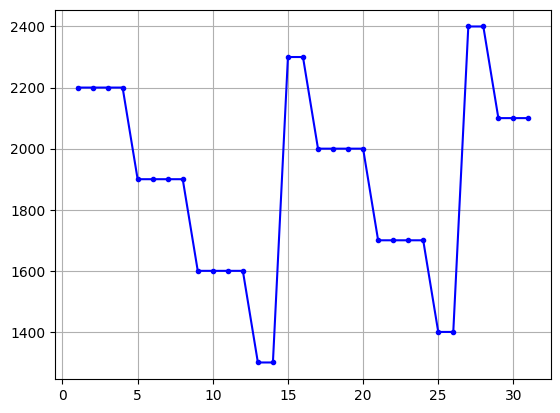

In [23]:
simtime = 31
env = simpy.Environment()
raw_mat = scm.RawMaterial(ID="RM1", name="raw materials mouse", extraction_quantity=650, 
                          extraction_time=1, mining_cost=0.01, cost=0.1) 

supplier = scm.Supplier(env=env, ID='S1', name='Supplier', node_type="infinite_supplier")

mouse = scm.Product(ID="B1", name="WM 1", manufacturing_cost=10, manufacturing_time=0, sell_price=300, buy_price=150,
                             raw_materials=[{"raw_material": raw_mat, "quantity": 1}], units_per_cycle=2500)

distributor1 = scm.InventoryNode(env=env, ID='D1', name='Distribution Center 1', node_type="distributor",
                                capacity=1000, initial_level=1000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':500, 'S':1000},
                                product_buy_price=150, product_sell_price=300)
distributor2 = scm.InventoryNode(env=env, ID='D2', name='Distribution Center 2', node_type="distributor",
                                capacity=1500, initial_level=1500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':1000, 'S':1500},
                                product_buy_price=150, product_sell_price=300)
distributor3 = scm.InventoryNode(env=env, ID='D3', name='Distribution Center 3', node_type="distributor",
                                capacity=2000, initial_level=2000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':1000, 'Q':1000},
                                product_buy_price=150, product_sell_price=300)
distributor4 = scm.InventoryNode(env=env, ID='D4', name='Distribution Center 4', node_type="distributor",
                                capacity=2500, initial_level=2500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':1500, 'Q':1000},
                                product_buy_price=150, product_sell_price=300)

link1= scm.Link(env=env, ID='L1', source=supplier, sink=distributor1, cost=20, lead_time=lambda: 1)
link2 = scm.Link(env=env, ID='L2', source=supplier, sink=distributor2, cost=20, lead_time=lambda: 1)
link3 = scm.Link(env=env, ID='L3', source=supplier, sink=distributor3, cost=20, lead_time=lambda: 1)
link4 = scm.Link(env=env, ID='L4', source=supplier, sink=distributor4, cost=20, lead_time=lambda: 1)

demand1 = scm.Demand(env=env, ID='demand_D1', name='Demand 1', order_arrival_model=lambda: 1, order_quantity_model=lambda:20, 
                     delivery_cost=lambda:20, lead_time=lambda: 1, demand_node=distributor1)
demand2 = scm.Demand(env=env, ID='demand_D2', name='Demand 2', order_arrival_model=lambda: 1, order_quantity_model=lambda:40, 
                     delivery_cost=lambda:20, lead_time=lambda: 1, demand_node=distributor1)
demand3 = scm.Demand(env=env, ID='demand_D3', name='Demand 3', order_arrival_model=lambda: 2, order_quantity_model=lambda:60, 
                     delivery_cost=lambda:20, lead_time=lambda: 1, demand_node=distributor2)
demand4 = scm.Demand(env=env, ID='demand_D4', name='Demand 4', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
                     delivery_cost=lambda:20, lead_time=lambda: 1, demand_node=distributor2)
demand5 = scm.Demand(env=env, ID='demand_D5', name='Demand 5', order_arrival_model=lambda: 3, order_quantity_model=lambda:100, 
                     delivery_cost=lambda:20, lead_time=lambda: 1, demand_node=distributor3)
demand6 = scm.Demand(env=env, ID='demand_D6', name='Demand 6', order_arrival_model=lambda: 3, order_quantity_model=lambda:120, 
                     delivery_cost=lambda:20, lead_time=lambda: 1, demand_node=distributor3)
demand7 = scm.Demand(env=env, ID='demand_D7', name='Demand 7', order_arrival_model=lambda: 4, order_quantity_model=lambda:140, 
                     delivery_cost=lambda:20, lead_time=lambda: 1, demand_node=distributor4)
demand8 = scm.Demand(env=env, ID='demand_D8', name='Demand 8', order_arrival_model=lambda: 4, order_quantity_model=lambda:160, 
                     delivery_cost=lambda:20, lead_time=lambda: 1, demand_node=distributor4)

inventory_nodes = [supplier,distributor1, distributor2, distributor3, distributor4]
inventory_links = [link1, link2, link3, link4]
demand_nodes = [demand1, demand2, demand3, demand4, demand5, demand6, demand7, demand8]
scm.global_logger.enable_logging()
env.run(until=simtime)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes = inventory_nodes, links = inventory_links, demands = demand_nodes)
supplynet = scm.simulate_sc_net(supplynet, sim_time=simtime)
for node in inventory_nodes:
    inv_levels = np.array(node.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)


Performance:
	Available Inventory: [760, 940, 1560, 2500], Total = 5760
	Inventory cost: [4906.0, 8258.8, 11655.600000000004, 15466.0], Total = 40286.4
	Inventory Spend: [243000, 252000, 297000, 360000], Total = 1152000
	Transportation cost: [30, 40, 30, 40, 310, 310, 160, 160, 110, 110, 80, 80], Total = 1460
	Total cost: [247936.0, 260298.8, 308685.6, 375506.0, 310, 310, 160, 160, 110, 110, 80, 80], Total = 1193746.4
	Total #products sold: [600, 1200, 900, 1200, 1000, 1200, 1120, 1280], Total = 8500
	Total revenue: 2550000
	Net profit (Totalcost - Revenue): 1356253.6


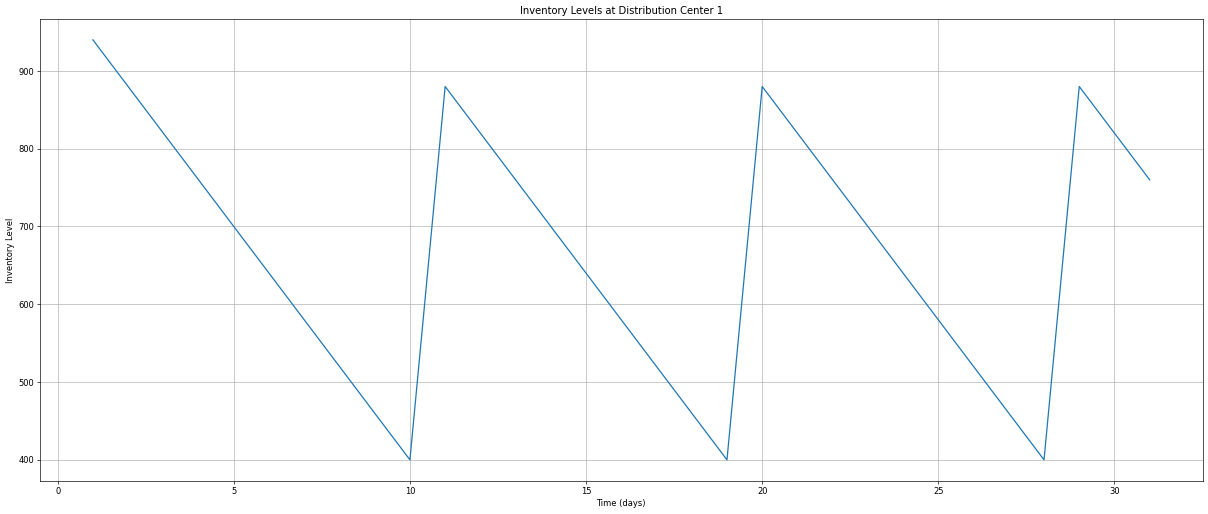

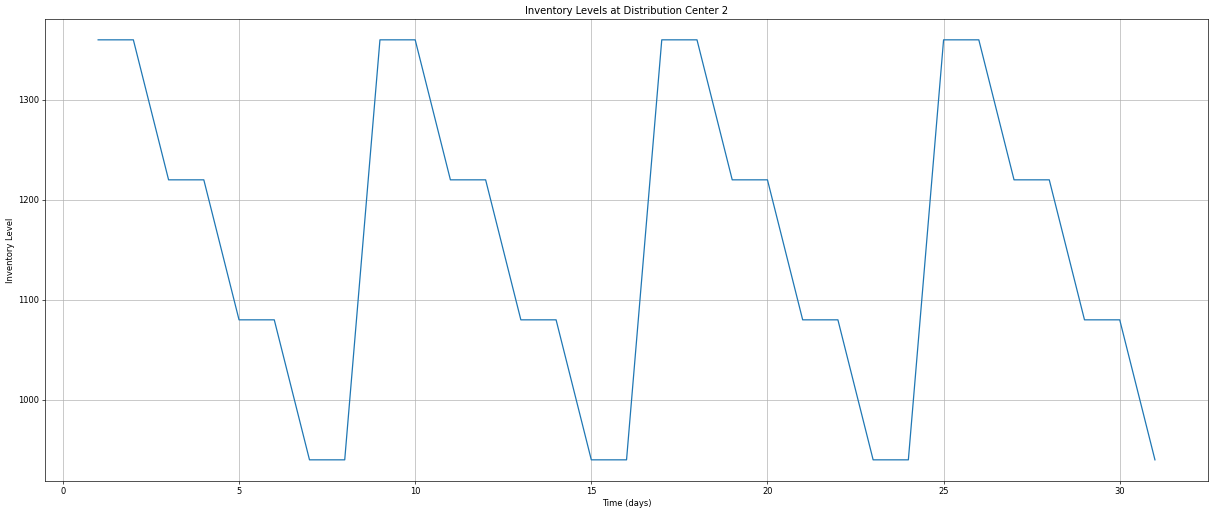

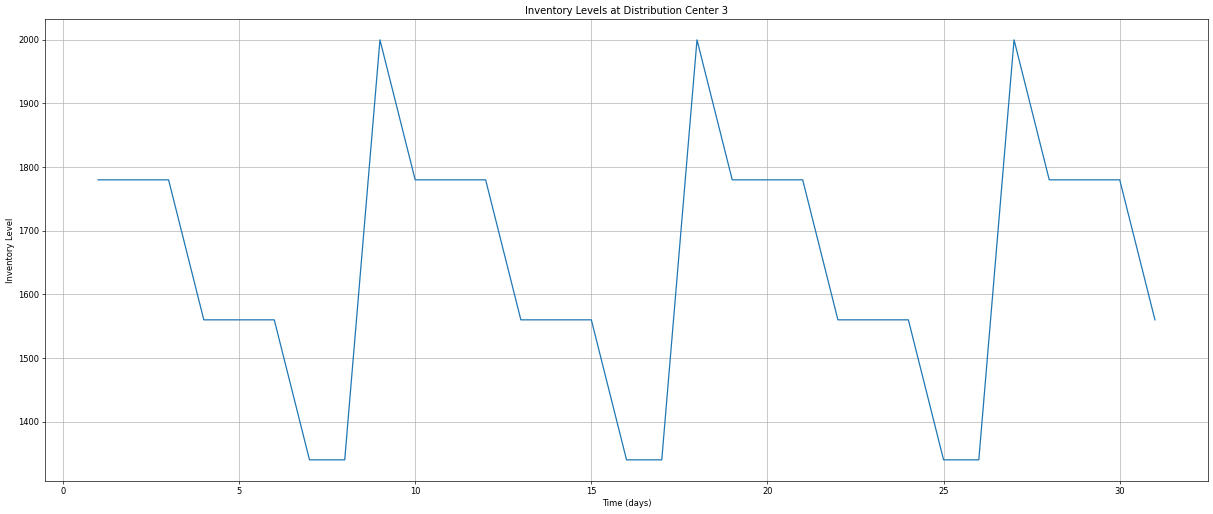

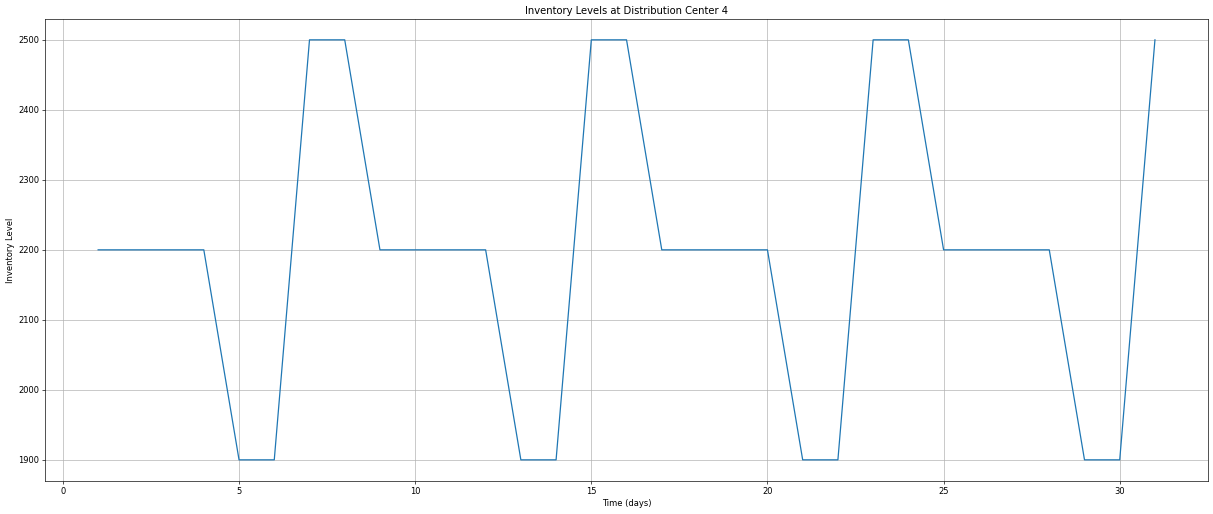

In [10]:
nodes = [distributor1, distributor2, distributor3, distributor4]
demands = [demand1, demand2, demand3, demand4, demand5, demand6, demand7, demand8]

available_inventory = []
inventory_costs = []
inventory_spends = []
tranportation_costs = []
total_costs = []
total_units_sold = []

for node in nodes:
    available_inventory.append(node.inventory.inventory.level)
    inventory_costs.append(node.inventory_cost)
    inventory_spends.append(sum([x[1] for x in node.inventory.inventory_spend]))
    tranportation_costs.append(sum([x[1] for x in node.transportation_cost]))
    total_costs.append(node.node_cost)

for demand in demands:
    if(demand.transportation_cost):
        tranportation_costs.append(demand.node_cost)
        total_units_sold.append(demand.total_products_sold)
        total_costs.append(demand.node_cost)


print(f"Performance:")
print(f"\tAvailable Inventory: {available_inventory}, Total = {sum(available_inventory)}")
print(f"\tInventory cost: {inventory_costs}, Total = {sum(inventory_costs)}")
print(f"\tInventory Spend: {inventory_spends}, Total = {sum(inventory_spends)}")
print(f"\tTransportation cost: {tranportation_costs}, Total = {sum(tranportation_costs)}")

print(f"\tTotal cost: {total_costs}, Total = {sum(total_costs)}")
print(f"\tTotal #products sold: {total_units_sold}, Total = {sum(total_units_sold)}")
# print(f"\tSell price: {.sell_price}")
revenue = sum(total_units_sold) * mouse.sell_price
print(f"\tTotal revenue: {revenue}")
print(f"\tNet profit (Totalcost - Revenue): {revenue - sum(total_costs)}")

from matplotlib.pyplot import figure

for node in nodes:
    figure(figsize=(25, 10), dpi=60)
    inv_levels = np.array(node.inventory.instantaneous_levels)
    plt.plot(inv_levels[:,0],inv_levels[:,1], label=node.name)
    plt.title(f'Inventory Levels at {node.name}')
    plt.xlabel('Time (days)') 
    plt.ylabel('Inventory Level')
    plt.grid() # add grid
    plt.show()